In [138]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


In [139]:
data_train_path = "./shapes/train/circle"
data_test_path = "./shapes/test"
data_val_path = "./shapes/validation/circle"

In [140]:
img_width = 180
img_height = 180

In [141]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                         shuffle=True,
                                                         image_size=(img_width,img_height),
                                                         batch_size=32,
                                                         validation_split=False )

Found 200 files belonging to 2 classes.


In [142]:
data_cat = data_train.class_names

In [143]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                         shuffle=False,
                                                         image_size=(img_width,img_height),
                                                         batch_size=32,
                                                         validation_split=False )

Found 141 files belonging to 2 classes.


In [144]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                         shuffle=False,
                                                         image_size=(img_width,img_height),
                                                         batch_size=32,
                                                         validation_split=False )

Found 90 files belonging to 3 classes.


2024-05-09 03:18:06.016369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


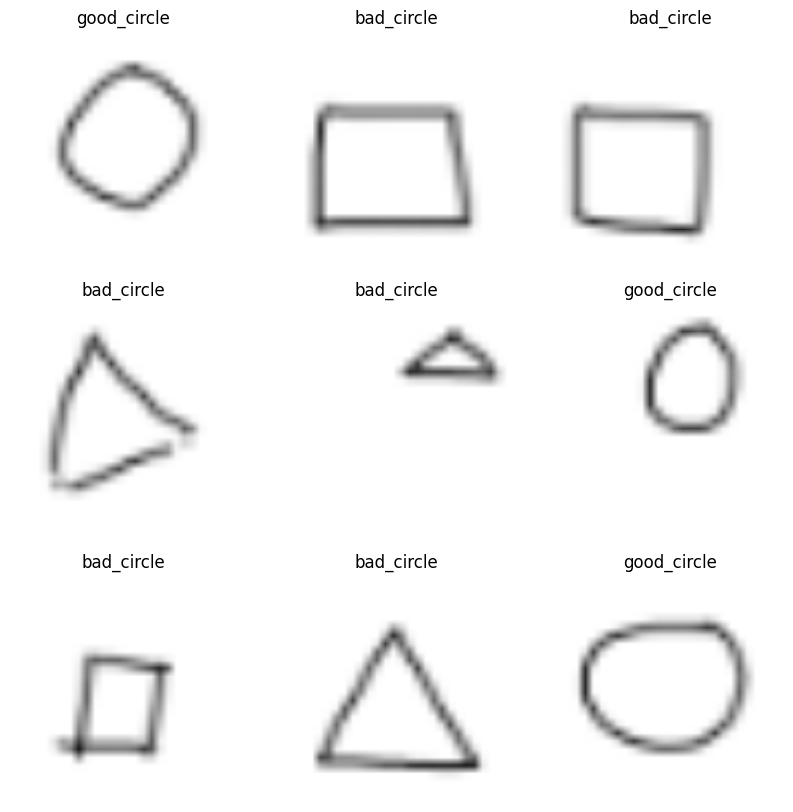

In [145]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [146]:
from tensorflow.keras.models import Sequential

In [147]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [149]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [150]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [151]:
epochs_size = 50
history = model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.5286 - loss: 2.1573 - val_accuracy: 0.5745 - val_loss: 0.7178
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - accuracy: 0.4591 - loss: 0.7261 - val_accuracy: 0.5745 - val_loss: 0.6913
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - accuracy: 0.4974 - loss: 0.6955 - val_accuracy: 0.5745 - val_loss: 0.6895
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.5417 - loss: 0.6937 - val_accuracy: 0.5887 - val_loss: 0.6895
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 404ms/step - accuracy: 0.5790 - loss: 0.6891 - val_accuracy: 0.4468 - val_loss: 0.6870
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - accuracy: 0.6134 - loss: 0.6816 - val_accuracy: 0.5816 - val_loss: 0.6813
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - accuracy: 0.5328 - loss: 0.6796 - val_accuracy: 0.5887 - val_loss: 0.6722
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.6961 - loss: 0.6595 - val_accuracy: 0.4255 - val_loss:

Text(0.5, 1.0, 'Loss')

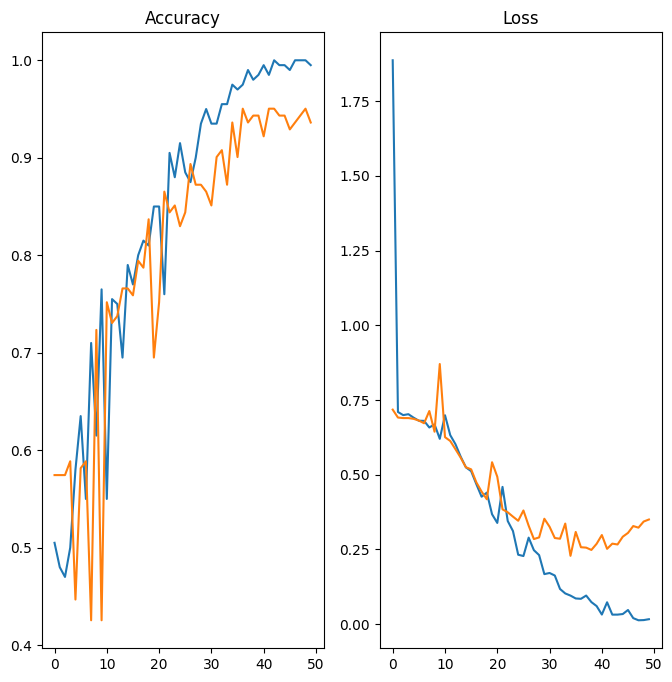

In [152]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')


In [153]:
image = "./drawing(5).png"
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [154]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [155]:
score = tf.nn.softmax(predict)

In [156]:
print("Shape is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score*100)))
type = data_cat[np.argmax(score)]

Shape is good_circle with accuracy of 99.99


In [157]:
if(type == "good_triangle" or type == "good_circle" or type == "good_square"):
    print(" No chances of fine motor skill developmental delay")
else:
    print("Chances of fine motor skill developmental delay")

 No chances of fine motor skill developmental delay


In [158]:
model.save("circle_cnn_model.h5")

In [26]:
image = "./drawing(67).png"
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [27]:
new_model = keras.models.load_model("cnn_model.h5")
predict_new = new_model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [32]:
new_score = tf.nn.softmax(predict_new)

In [33]:
print("Shape is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(new_score)],np.max(new_score*100)))
type = data_cat[np.argmax(new_score)]

IndexError: list index out of range